# ITS307 Data Analytics                                                   : Spring Semester 2022
# Lecture 13 - Exercise
# K Nearest Neighbours

![image.png](attachment:image.png)

# Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

# Part A - KNN for Classification

# 1. Data Manipulation with pandas

In [ ]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

# 2. EDA


1. Create correlation matrix and plot it using heatmap
2. Use petel length and petel witdth to check distribution of your data (Scatter plot)

Note: Use seaborn

# 3. Split data into traning and test set

Note: Make sure that your train and test split will have equal number of data from each class

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(iris.data, iris.target, random_state =5, shuffle = True, stratify = iris.target)

In [ ]:
ytest

array([0, 0, 2, 0, 2, 0, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0,
       1, 0, 0, 2, 1, 1, 0, 2, 2, 2, 0, 1, 2, 1, 0, 1])

# 4. Training Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors= 5)
classifier.fit(xtrain,ytrain)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(xtest)
y_pred

array([0, 0, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0,
       1, 0, 0, 2, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 1])

# 5. Model Evaluation

1. Check train and test score
2. Display number of truely predicted sample in each class (Confusion matrix)

In [ ]:
classifier.score(xtrain, ytrain)

0.9732142857142857

In [ ]:
classifier.score(xtest,ytest)

0.9210526315789473

# 6. Chosing best k

1. Plot train and test score for k values ranging from 1 to 50

In [ ]:
from sklearn.metrics import confusion_matrix

matrix =confusion_matrix(ytest,y_pred)
matrix



array([[12,  0,  0],
       [ 0, 12,  1],
       [ 0,  2, 11]])

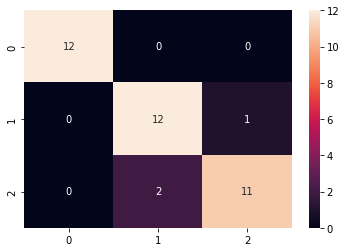

In [ ]:
sns.heatmap( data=matrix, annot = True)
plt.xlabel =("predicted")
plt.ylabel=("True value")

In [ ]:
trainscore =[]
testscore =[]
for i in range(1,50):
  KM = KNeighborsClassifier(n_neighbors= i)
  KM.fit(xtrain,ytrain)
  trainscore.append(KM.score(xtrain,ytrain))
  testscore.append(KM.score(xtest,ytest))

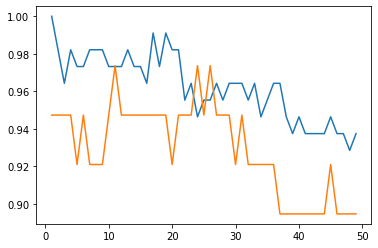

In [ ]:
plt.plot(np.arange(1,50),trainscore)
plt.plot(np.arange(1,50),testscore)
plt.show()

# Part B - KNN for Regression

Use boston data to implement KNN in Regression.

Note: Experiment affect of feature scaling.

In [ ]:
boston = datasets.load_boston()
boston.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
xtrain,xtest,ytrain,ytest =  train_test_split(boston.data, boston.target, test_size =0.2,random_state=5)
xtrain.shape

(404, 13)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linearmodel = LinearRegression()
linearmodel.fit(xtrain,ytrain)

y_pred = linearmodel.predict(xtest)
MSE = mean_squared_error(ytest,y_pred)
MSE

20.869292183770906

In [ ]:
linearmodel.score(xtest,ytest)

0.7334492147453064

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors=6)
knnr.fit(xtrain,ytrain)
y_pred = knnr.predict(xtest)
MSE = mean_squared_error(ytest,y_pred)
MSE


34.27619825708061

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(boston.data)
x_scaled[0]

array([-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
        0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
       -1.45900038,  0.44105193, -1.0755623 ])

In [ ]:
x_train,x_test,y_train,y_test =  train_test_split(x_scaled, boston.target, test_size =0.2,random_state=5)
xtrain.shape

(404, 13)

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
MSE = mean_squared_error(y_test, y_pred)
MSE

20.869292183770824

In [ ]:
knnrg = KNeighborsRegressor(n_neighbors = 6)
knnrg.fit(x_train, y_train)
y_pred = knnrg.predict(x_test)
MSE = mean_squared_error(y_test, y_pred)
MSE

16.703899782135075

In [ ]:
knnrg.score(x_test,y_test)

0.7866512402751126

In [ ]:
MSEtr=[]
MSEte =[]
for i in range(1,50):
  knnrg = KNeighborsClassifier(n_neighbors= i)
  knnrg.fit(x_train,y_train)
  y_pred_train =knnrg.predict(x_train)
  y_pred_test =knnrg.predict(x_test)
  MSE1 = mean_squared_error(y_train,y_pred_train)
  MSEtr.append(MSE1)
  MSE2 = mean_squared_error(y_test,y_pred_test)
  MSEte.append(MSE2)


ValueError: ignored

In [ ]:
plt.plot(np.arange(1,50),MSEtr)
plt.plot(np.arange(1,50),MSEte)
plt.show()

# Conclusion